In [1]:
import pandas as pd
import matplotlib.pyplot as plt

purchases = pd.read_csv("PurchasesFINAL12312016_clean.csv")


In [2]:
kpis_compras = pd.DataFrame({
    "Métrica": [
        "Unidades totales compradas",
        "Monto total comprado ($)",
        "Precio promedio de compra ($)"
    ],
    "Valor": [
        purchases["Quantity"].sum(),
        purchases["Dollars"].sum(),
        purchases["PurchasePrice"].mean()
    ]
})

kpis_compras.round(2)


,Métrica,Valor
0,Unidades totales compradas,3.358236e+07
1,Monto total comprado ($),3.219008e+08
2,Precio promedio de compra ($),1.205000e+01


In [3]:
compras_proveedor = (
    purchases
    .groupby("VendorName")
    .agg(
        monto_comprado=("Dollars", "sum"),
        unidades_compradas=("Quantity", "sum"),
        precio_promedio_compra=("PurchasePrice", "mean")
    )
    .sort_values("monto_comprado", ascending=False)
)

compras_proveedor.round(2).head(10)


,monto_comprado,unidades_compradas,precio_promedio_compra
VendorName,,,
DIAGEO NORTH AMERICA INC,50959796.85,5459788,16.11
MARTIGNETTI COMPANIES,27861690.02,2640411,11.08
JIM BEAM BRANDS COMPANY,24203151.05,2737165,12.88
PERNOD RICARD USA,24124091.56,1647558,18.61
BACARDI USA INC,17624378.72,1427075,14.26
CONSTELLATION BRANDS INC,15573917.90,2325892,7.10
BROWN-FORMAN CORP,13529433.08,1006122,18.30
ULTRA BEVERAGE COMPANY LLP,13210613.93,1077527,15.81
E & J GALLO WINERY,12289608.09,1858260,7.26


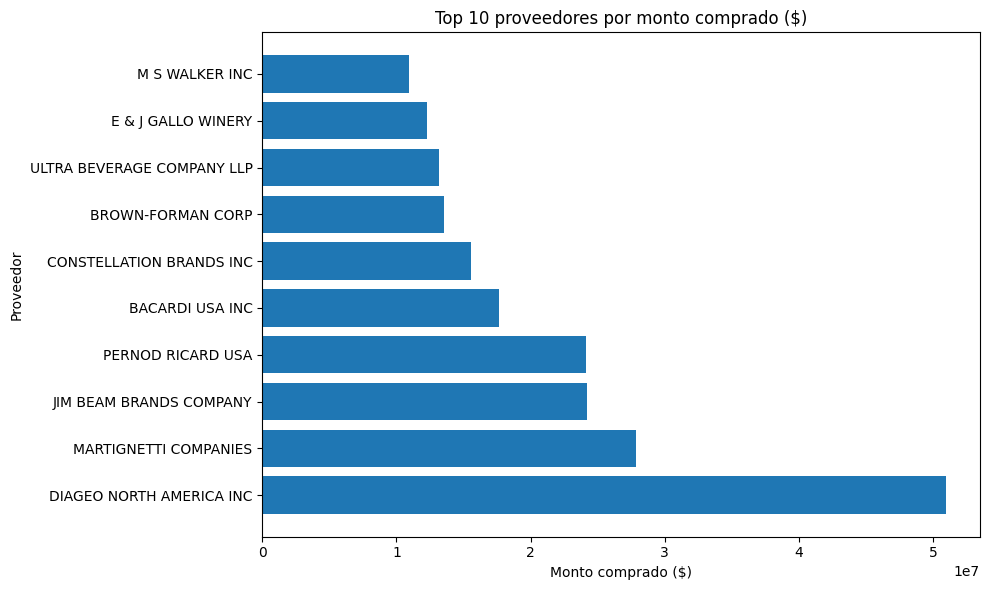

In [4]:
top_proveedores = compras_proveedor.head(10)

plt.figure(figsize=(10,6))
plt.barh(top_proveedores.index, top_proveedores["monto_comprado"])
plt.title("Top 10 proveedores por monto comprado ($)")
plt.xlabel("Monto comprado ($)")
plt.ylabel("Proveedor")
plt.tight_layout()
plt.show()


In [5]:
compras_sucursal = (
    purchases
    .groupby("Store")
    .agg(
        monto_comprado=("Dollars", "sum"),
        unidades_compradas=("Quantity", "sum")
    )
    .sort_values("monto_comprado", ascending=False)
)

compras_sucursal.round(2).head(10)


,monto_comprado,unidades_compradas
Store,,
76,17525106.25,1576664
73,15067956.85,1367354
34,14460167.96,1357009
50,14317350.83,1244243
38,13516574.29,1335777
66,12243511.19,1113889
67,10434986.99,955344
69,10039710.63,976503
60,8425066.74,844072


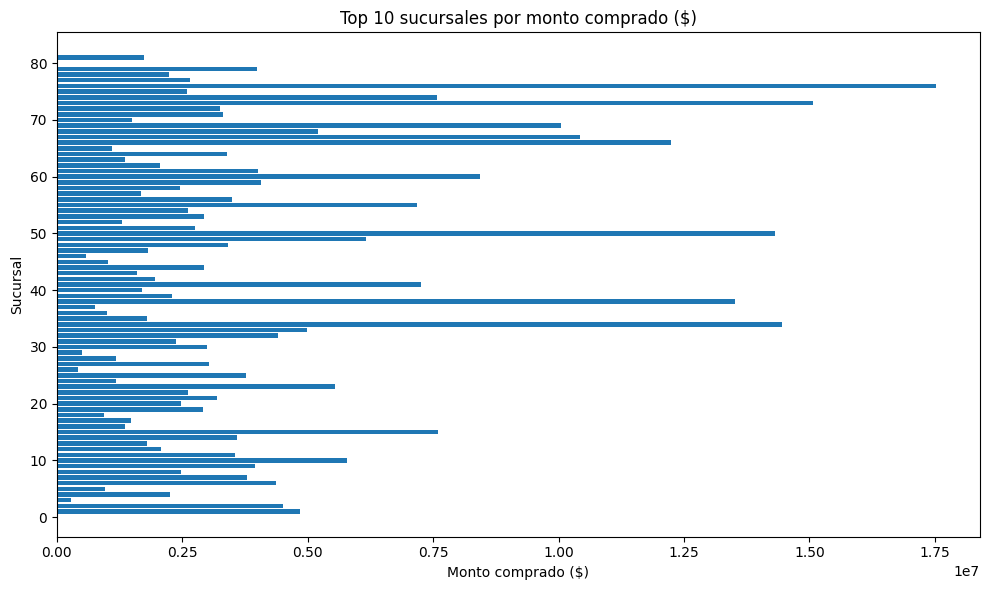

In [7]:
top_sucursales = compras_sucursal

plt.figure(figsize=(10,6))
plt.barh(top_sucursales.index, top_sucursales["monto_comprado"])
plt.title("Top 10 sucursales por monto comprado ($)")
plt.xlabel("Monto comprado ($)")
plt.ylabel("Sucursal")
plt.tight_layout()
plt.show()


In [8]:
compras_producto = (
    purchases
    .groupby(["InventoryId", "Description"])
    .agg(
        monto_comprado=("Dollars", "sum"),
        unidades_compradas=("Quantity", "sum"),
        precio_promedio_compra=("PurchasePrice", "mean")
    )
    .sort_values("monto_comprado", ascending=False)
)

compras_producto.round(2).head(10)


,,monto_comprado,unidades_compradas,precio_promedio_compra
InventoryId,Description,,,
50_MOUNTMEND_1233,Jack Daniels No 7 Black,248593.01,9463,26.27
76_DONCASTER_3405,Tito's Handmade Vodka,234775.56,10124,23.19
34_PITMERDEN_3405,Tito's Handmade Vodka,188186.85,8115,23.19
50_MOUNTMEND_8068,Absolut 80 Proof,187908.48,10302,18.24
34_PITMERDEN_3545,Ketel One Vodka,177396.56,8104,21.89
66_EANVERNESS_3405,Tito's Handmade Vodka,175988.91,7589,23.19
76_DONCASTER_3545,Ketel One Vodka,167173.93,7637,21.89
38_GOULCREST_3405,Tito's Handmade Vodka,162144.48,6992,23.19
34_PITMERDEN_4261,Capt Morgan Spiced Rum,160406.40,9920,16.17


In [11]:
compras_producto.sort_values("unidades_compradas", ascending=False).round(2).head(10)


,,monto_comprado,unidades_compradas,precio_promedio_compra
InventoryId,Description,,,
76_DONCASTER_6570,Kendall Jackson Chard Vt RSV,86012.85,12705,6.77
53_HILLFAR_8111,Smirnoff 80 Proof,8968.96,11648,0.77
27_MOUNTMEND_8111,Smirnoff 80 Proof,8304.45,10785,0.77
20_BREDWARDINE_8111,Smirnoff 80 Proof,8303.68,10784,0.77
50_MOUNTMEND_8068,Absolut 80 Proof,187908.48,10302,18.24
77_TAMWORTH_5111,Dr McGillicuddy's Mentholmnt,7415.28,10299,0.72
76_DONCASTER_3405,Tito's Handmade Vodka,234775.56,10124,23.19
34_PITMERDEN_6570,Kendall Jackson Chard Vt RSV,67490.13,9969,6.77
34_PITMERDEN_4261,Capt Morgan Spiced Rum,160406.40,9920,16.17


In [16]:
date_cols = ["PODate", "ReceivingDate", "InvoiceDate", "PayDate"]

for col in date_cols:
    purchases[col] = pd.to_datetime(purchases[col], errors="coerce")


In [14]:
compras_mes = (
    purchases
    .assign(Mes=purchases["PODate"].dt.to_period("M"))
    .groupby("Mes")["Dollars"]
    .sum()
    .reset_index()
)

compras_mes


,Mes,Dollars
0,2015-12,6950117.22
1,2016-01,19138815.42
2,2016-02,20147364.53
3,2016-03,20252968.80
4,2016-04,21798729.53
5,2016-05,28693060.33
6,2016-06,29699192.07
7,2016-07,32193842.50
8,2016-08,30747883.70
9,2016-09,26840919.81


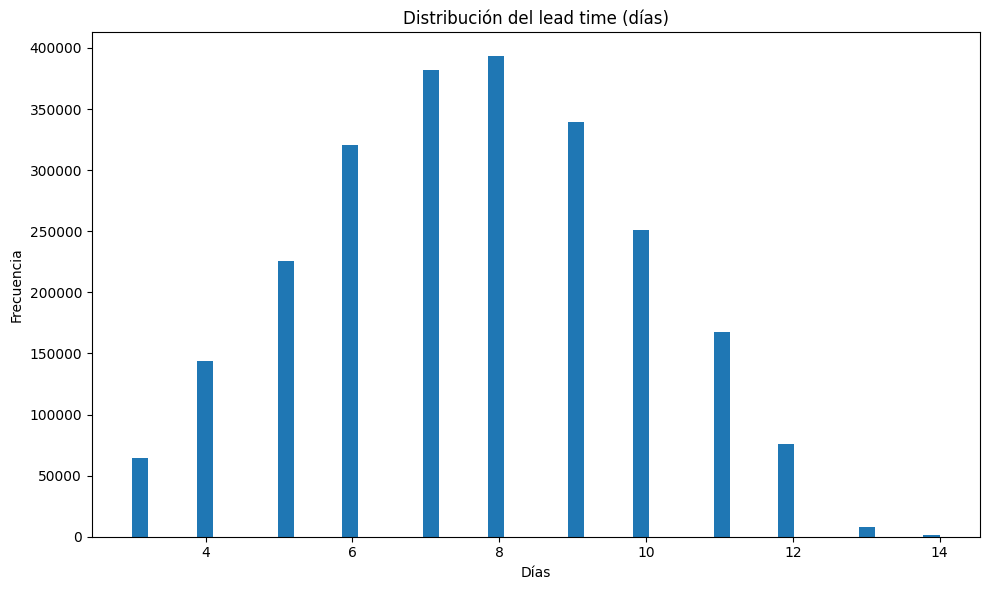

In [19]:
purchases["lead_time_dias"] = (
    purchases["ReceivingDate"] - purchases["PODate"]
).dt.days


lead_time_kpis = purchases["lead_time_dias"].describe()
lead_time_kpis


plt.figure(figsize=(10,6))
plt.hist(purchases["lead_time_dias"].dropna(), bins=50)
plt.title("Distribución del lead time (días)")
plt.xlabel("Días")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


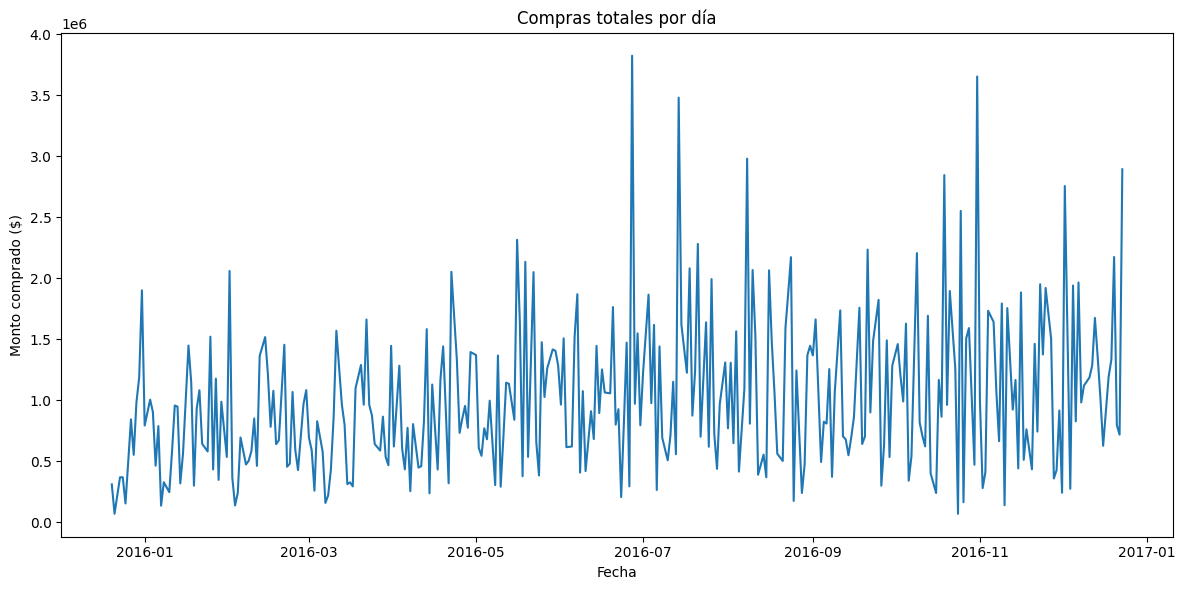

In [20]:
compras_diarias = (
    purchases
    .groupby("PODate")["Dollars"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
plt.plot(compras_diarias["PODate"], compras_diarias["Dollars"])
plt.title("Compras totales por día")
plt.xlabel("Fecha")
plt.ylabel("Monto comprado ($)")
plt.tight_layout()
plt.show()


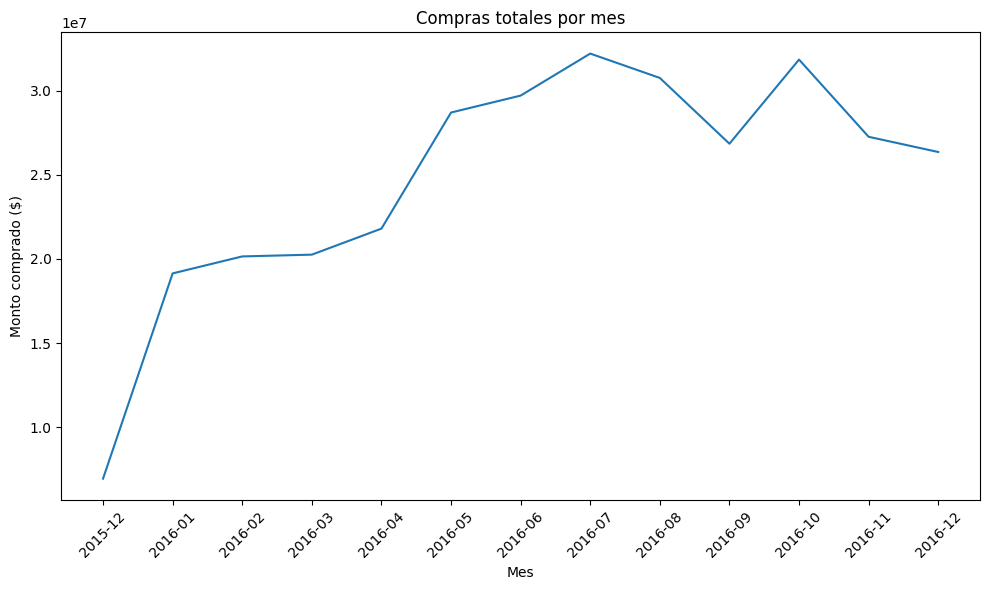

In [21]:
compras_mes = (
    purchases
    .assign(Mes=purchases["PODate"].dt.to_period("M"))
    .groupby("Mes")["Dollars"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10,6))
plt.plot(compras_mes["Mes"].astype(str), compras_mes["Dollars"])
plt.title("Compras totales por mes")
plt.xlabel("Mes")
plt.ylabel("Monto comprado ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


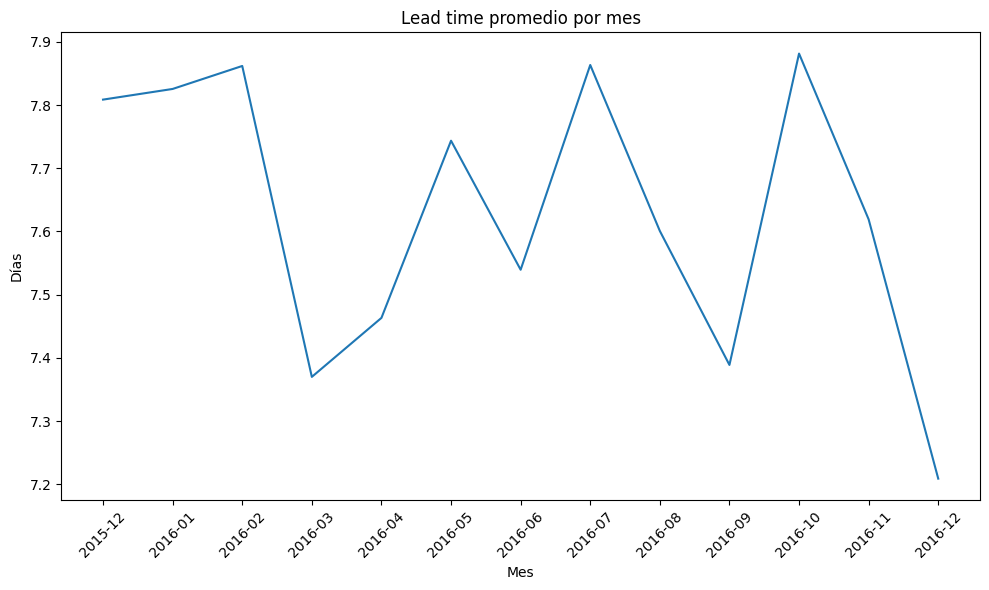

In [23]:
lead_time_mes = (
    purchases
    .assign(Mes=purchases["PODate"].dt.to_period("M"))
    .groupby("Mes")["lead_time_dias"]
    .mean()
    .reset_index()
)

lead_time_mes


plt.figure(figsize=(10,6))
plt.plot(lead_time_mes["Mes"].astype(str), lead_time_mes["lead_time_dias"])
plt.title("Lead time promedio por mes")
plt.xlabel("Mes")
plt.ylabel("Días")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El análisis de compras muestra una estrategia orientada a grandes volúmenes con una fuerte concentración del gasto en un conjunto reducido de proveedores, siendo Diageo el principañ proveedor.

A nivel de sucursales, algunas concentran un volumen significativamente mayor de compras, lo que podría estar asociado a mayor tamaño o mayor demanda esperada.

Desde una perspectiva temporal, las compras presentan una elevada variabilidad a nivel diario, sin un patrón fijo de reposición. No se observa una frecuencia diaria regular, lo que indica flexibilidad operativa en la ejecución de órdenes. En contraste, el análisis mensual revela picos de compra bien definidos, concentrados principalmente entre mayo y julio, y un nuevo incremento hacia octubre. Dado que el análisis se sitúa en el Reino Unido, estos períodos pueden asociarse a estacionalidad de consumo propia de la primavera–verano y a la preparación para el último trimestre del año.

En términos logísticos, el tiempo de entrega se mantiene estable a lo largo del año, concentrándose mayoritariamente entre 7 y 9 días. No se identifican deterioros del lead time durante los meses de mayor volumen de compra y los casos de demoras superiores a los 12 días son poco frecuentes.